# Init

https://docs.google.com/spreadsheets/d/1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO/edit?usp=sharing&ouid=101807145143614308444&rtpof=true&sd=true

In [1]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [2]:
! gdown --id 1_-QnYyUPg0GKCU9VGkhtYkUHhECDc008

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_-QnYyUPg0GKCU9VGkhtYkUHhECDc008
To: /content/fintech-testcase-default.xlsx
100% 928k/928k [00:00<00:00, 47.4MB/s]


Во вложении, файл, нужно сделать следующее

-сделать модель, предсказывающую вероятность дефолта (таргет fpd5_flg),
в качестве предикторов можно использовать все что есть в файле
(не обязательно абсолютно все), кроме dt (это дата выдачи кредита).
Можно делать в чем угодно. Преобразовывать переменные можно как угодно.
В качестве инструмента можно выбрать обычную логистическую регрессию.

-на выходе должен быть тот же самый файл, но напротив каждого наблюдения
должна быть проставлена вероятность дефолта по построенной модели

-нужно сделать мини-отчет по модели в Excel или Word (или Jupiter Notebook),
показать Gini (AuROC) модели, распределение (гистограмму) по предсказанной
вероятности дефолта и описать кратко что было сделано и как

Оцениваться будет не финальный результат в плане Gini (или других метрик),
а скорее ход мыслей и порядок действий.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('/content/fintech-testcase-default.xlsx')

# EDA

In [ ]:
df.head()

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0


In [5]:
df.groupby(['social_status'], dropna=False, as_index=False).agg(
                                                                  {
                                                                    'fpd5_flg': ('mean', 'count'),
                                                                    'age': ('median', lambda x: np.percentile(x, 10)),
                                                                    'device_quaility_index': ('median'),
                                                                    'behavioral_index': ('median'),
                                                                  }
                                                                 ).sort_values(('fpd5_flg', 'mean'), ascending=False)

social_status  fpd5_flg          age  \
                                                           mean count median   
10                                      Self-Employed  0.302195  2323   36.0   
8                                       Retail Worker  0.298507   402   32.0   
11                                         Unemployed  0.288162   642   33.0   
1                                      Business Owner  0.284524  1680   37.0   
3                                           Freelance  0.280566   777   36.0   
5                                               Other  0.276571  1703   35.0   
0                                   BPO Professionals  0.272767  2295   29.0   
6                            Private Company Employee  0.264286  3500   32.0   
4                                 Government Employee  0.258247  1061   36.0   
9                                             Retired  0.241758    91   60.0   
7   Professional Worker (Doctors, Engineers, Accou...  0.194704   642   33.0   
2                                  Financial Services  0.182186   247   31.0   

              device_quaility_index behavioral_index  
   <lambda_0>                median           median  
10       26.0                   3.0              4.0  
8        25.0                   3.0              4.0  
11       25.0                   3.0              4.0  
1        27.0                   3.0              4.0  
3        25.0                   3.0              4.0  
5        25.0                   3.0              4.0  
0        23.0                   3.0              4.0  
6        24.0                   3.0              4.0  
4        25.0                   3.0              4.0  
9        40.0                   2.0              4.0  
7        24.0                   3.0              4.0  
2        24.6                   3.0              4.0

In [ ]:
df['fpd5_flg'].mean()

0.2727982815856278

In [ ]:
df.isna().mean()

fpd5_flg                  0.000000
dt                        0.000000
gender                    0.000000
device_quaility_index     0.036777
behavioral_index          0.036777
type_of_document          0.000000
age                       0.000000
email_domain_formatted    0.000000
social_status             0.000000
salary                    0.046475
disbursment_type          0.000000
os                        0.001041
email_index               0.002148
dtype: float64

In [ ]:
df['dt'] = pd.to_datetime(df['dt'],format='%Y-%m-%d')

In [ ]:
df['dt'].agg(['min','max'])

min   2020-12-09
max   2021-02-03
Name: dt, dtype: datetime64[ns]

In [ ]:
df.shape

(15363, 13)

In [ ]:
df.groupby('os')['fpd5_flg'].agg(['count','mean'])

,count,mean
os,,
Android,11499,0.284460
Chrome OS,5,0.600000
Linux,7,0.571429
OS X,4,0.500000
Windows,845,0.261538
iOS,2947,0.230743
macOS,40,0.150000


In [ ]:
df.groupby('email_domain_formatted')['fpd5_flg'].agg(['count','mean']).sort_values('count',ascending=False).head(10)

,count,mean
email_domain_formatted,,
GMAIL.COM,12109,0.286564
YAHOO.COM,2626,0.228104
YAHOO.COM.PH,182,0.153846
DEPED.GOV.PH,100,0.230000
ICLOUD.COM,88,0.238636
YMAIL.COM,67,0.223881
ROCKETMAIL.COM,37,0.216216
HOTMAIL.COM,22,0.136364
OUTLOOK.COM,19,0.210526


In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
behavioral_index,,
1.0,23,0.043478
2.0,202,0.198020
3.0,4675,0.265027
4.0,4721,0.260538
5.0,4447,0.287385
6.0,730,0.324658
NaN,565,0.293805


<Axes: xlabel='behavioral_index'>

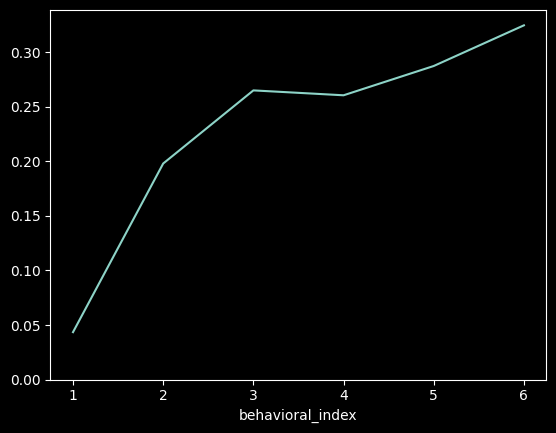

In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].mean().plot(ylim=0)

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
device_quaility_index,,
0.0,1122,0.330660
1.0,2374,0.291070
2.0,2337,0.307659
3.0,7837,0.257496
4.0,1128,0.200355
NaN,565,0.293805


<Axes: xlabel='device_quaility_index'>

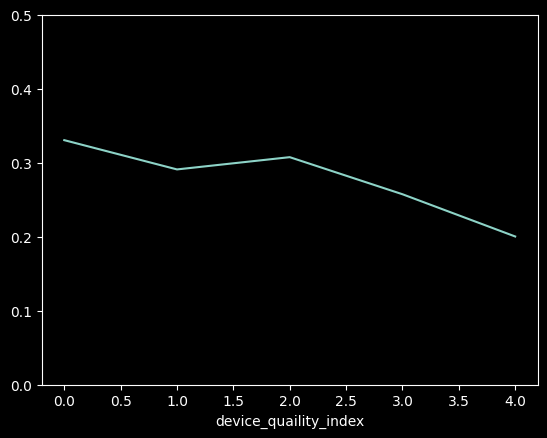

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].mean().plot(ylim=(0, 0.5))

In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
type_of_document,,
Driver license ID,3073,0.277904
PRC,449,0.187082
Passport,1867,0.274772
SSS,1498,0.242991
TIN,3057,0.307164
UMID,5419,0.265178


<Axes: xlabel='type_of_document'>

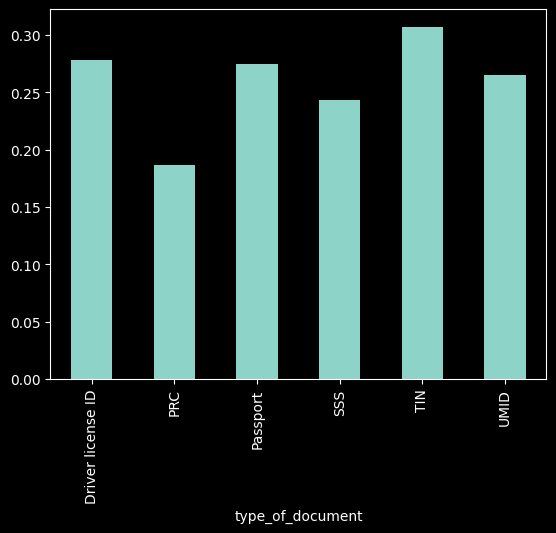

In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].mean().plot(kind='bar')

<Axes: >

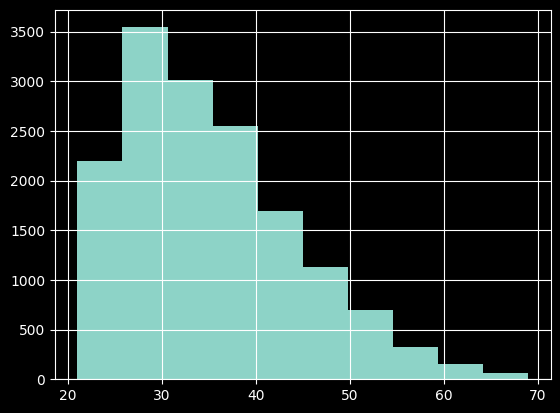

In [ ]:
df['age'].hist()

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


<Figure size 640x480 with 0 Axes>

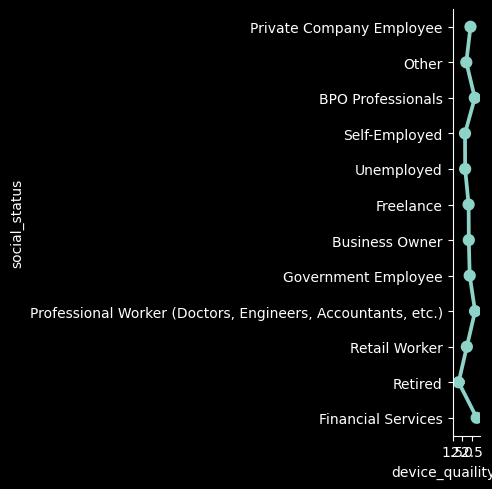

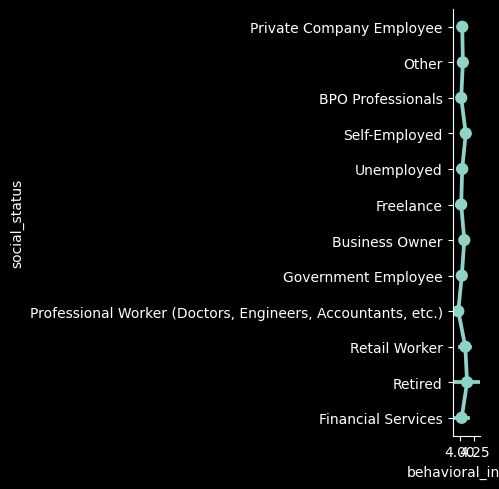

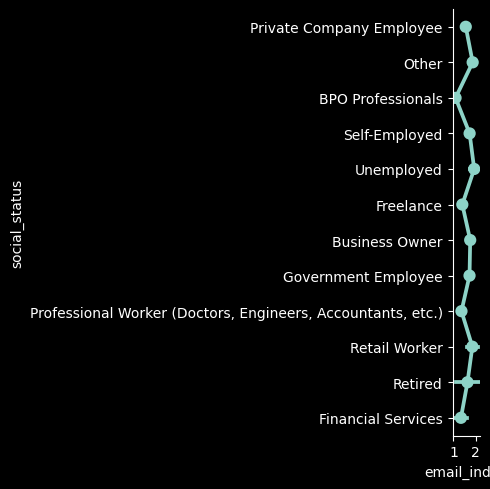

In [ ]:
import seaborn as sns
gre = df['age'].sum()
for i, col in enumerate(['device_quaility_index', 'behavioral_index', 'email_index']):
  plt.figure(i)
  sns.catplot(x=col, y='social_status', data=df, kind='point')


In [ ]:
df['age_bin'] = pd.qcut(df['age'],3)

In [ ]:
df.groupby('age_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
age_bin,,
"(20.999, 30.0]",5742,0.293974
"(30.0, 38.0]",4625,0.276324
"(38.0, 69.0]",4996,0.245196


In [ ]:
df[(df['age'].between(df['age'].quantile(0.05), df['age'].quantile(0.4))) * (df['social_status'] == 'Retired')].sort_values('age', ascending=False)

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin
1686,1,2021-02-02,1,2.0,4.0,TIN,31,GMAIL.COM,Retired,NaN,E-wallet,Android,1.0,"(30.0, 38.0]"
13627,0,2021-01-03,1,1.0,3.0,UMID,26,YAHOO.COM,Retired,NaN,Bank,Android,1.0,"(20.999, 30.0]"
3801,0,2020-12-22,1,3.0,6.0,TIN,24,GMAIL.COM,Retired,NaN,Bank,iOS,1.0,"(20.999, 30.0]"


In [ ]:
df[df['social_status'] == 'Retired'][df['age'] == df[df['social_status'] == 'Retired']['age'].min()]

<ipython-input-24-ca3afbdfb879>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['social_status'] == 'Retired'][df['age'] == df[df['social_status'] == 'Retired']['age'].min()]


,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin
3801,0,2020-12-22,1,3.0,6.0,TIN,24,GMAIL.COM,Retired,NaN,Bank,iOS,1.0,"(20.999, 30.0]"


In [ ]:
df[df['social_status'] == 'Retired']['age'].min()

24

<Axes: xlabel='social_status,age_bin'>

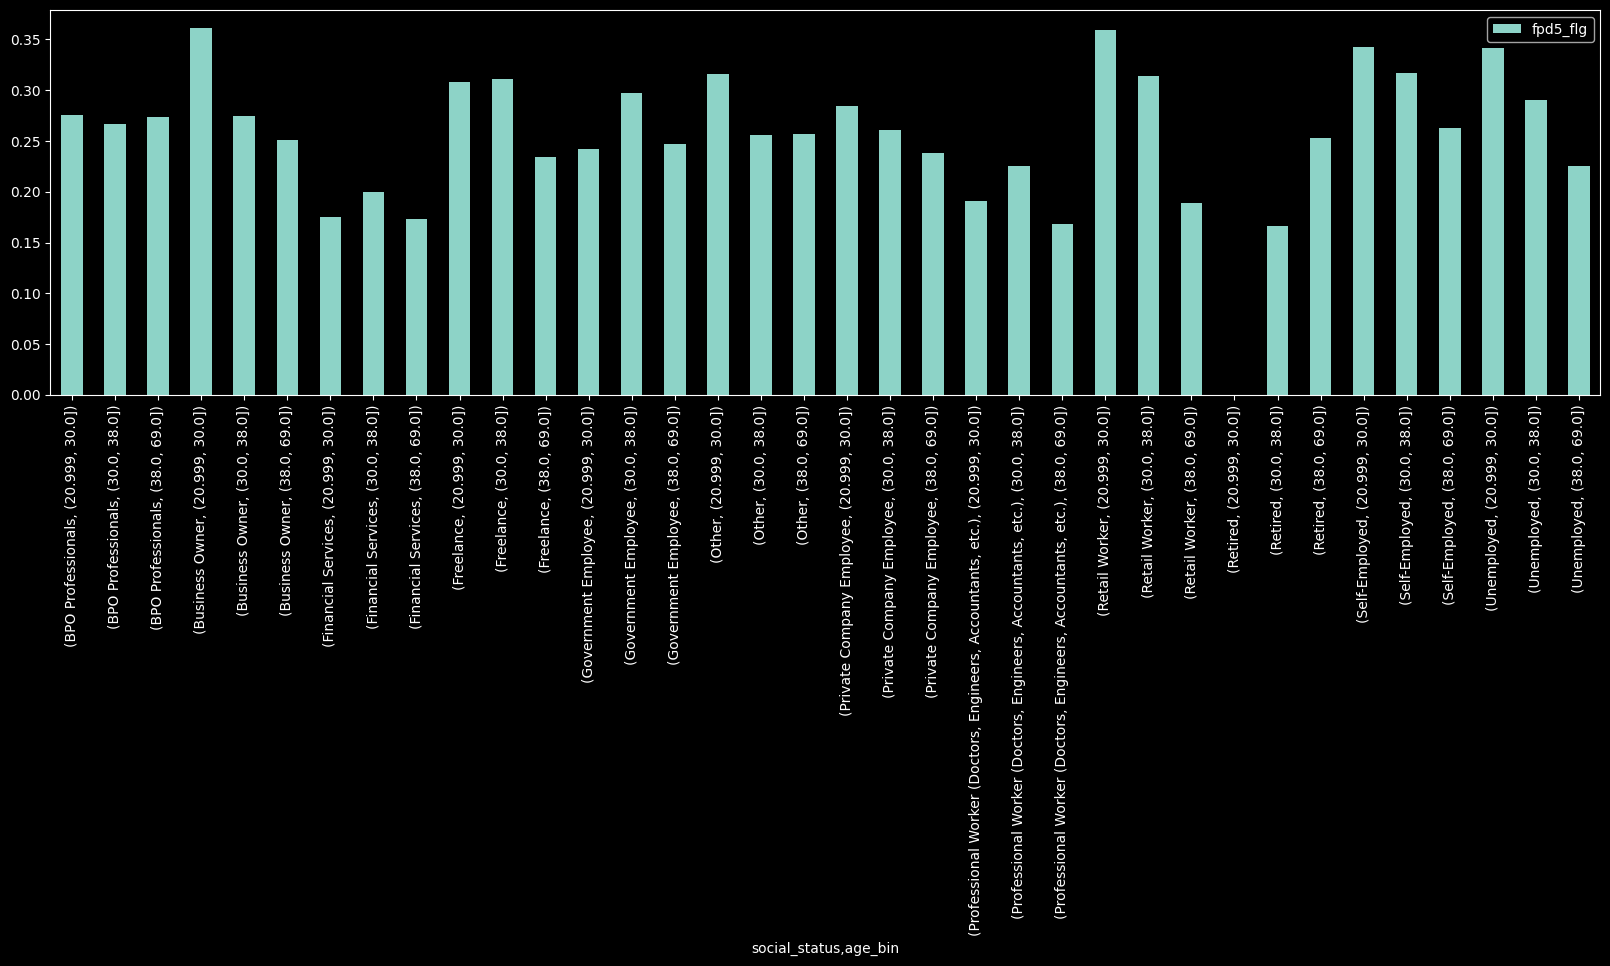

In [ ]:
df.groupby(['social_status', 'age_bin'], dropna=False).agg({'fpd5_flg': 'mean'}).sort_values(['social_status', 'age_bin'], ascending=[True, True]).plot(kind='bar', figsize=(20, 5))

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0,"(20.999, 30.0]"
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0,"(30.0, 38.0]"
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0,"(38.0, 69.0]"
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0,"(20.999, 30.0]"
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0,"(30.0, 38.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0,"(30.0, 38.0]"
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0,"(30.0, 38.0]"
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0,"(20.999, 30.0]"
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0,"(30.0, 38.0]"


In [ ]:
t = df.groupby('social_status',dropna=False)['fpd5_flg'].agg(['count','mean'])

In [ ]:
t

,count,mean
social_status,,
BPO Professionals,2295,0.272767
Business Owner,1680,0.284524
Financial Services,247,0.182186
Freelance,777,0.280566
Government Employee,1061,0.258247
Other,1703,0.276571
Private Company Employee,3500,0.264286
"Professional Worker (Doctors, Engineers, Accountants, etc.)",642,0.194704
Retail Worker,402,0.298507


<Axes: xlabel='social_status'>

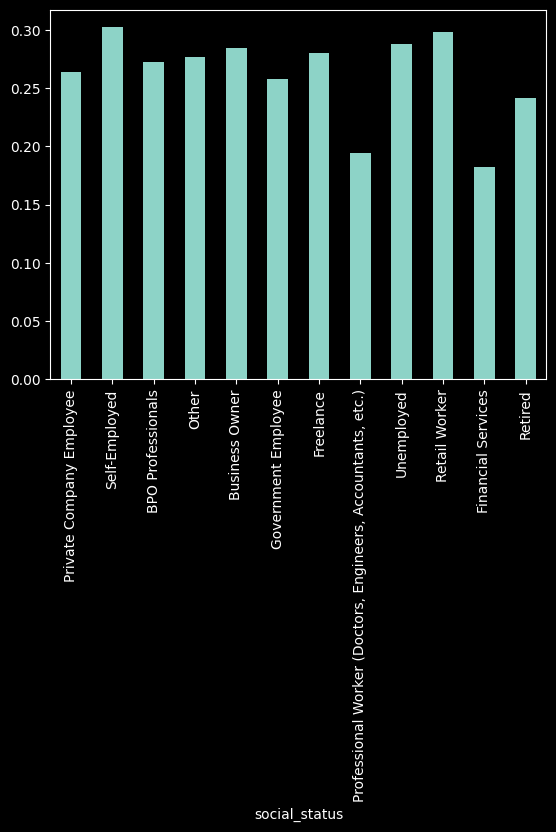

In [ ]:
t.sort_values('count',ascending=False)['mean'].plot(kind='bar')

<Axes: >

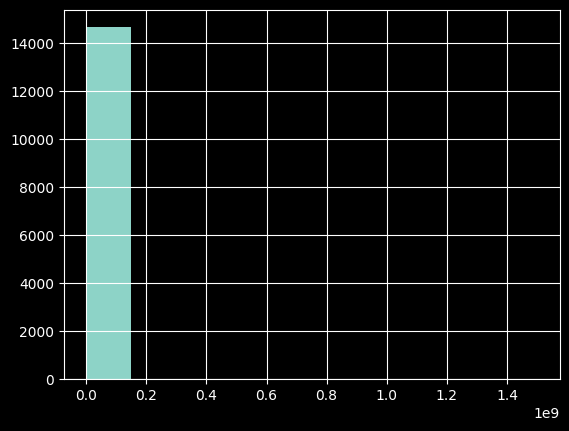

In [ ]:
df['salary'].hist()

In [ ]:
df['salary_bin'] = pd.qcut(df['salary'],5)

In [ ]:
df.groupby('salary_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
salary_bin,,
"(-0.001, 14000.0]",3026,0.298083
"(14000.0, 18000.0]",3036,0.291173
"(18000.0, 22000.0]",2820,0.275532
"(22000.0, 30000.0]",3906,0.273682
"(30000.0, 1500020000.0]",1861,0.193982


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin,salary_bin
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0,"(20.999, 30.0]","(18000.0, 22000.0]"
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0,"(30.0, 38.0]","(14000.0, 18000.0]"
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0,"(38.0, 69.0]","(-0.001, 14000.0]"
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0,"(20.999, 30.0]","(30000.0, 1500020000.0]"
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0,"(30.0, 38.0]","(22000.0, 30000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0,"(30.0, 38.0]","(22000.0, 30000.0]"
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0,"(30.0, 38.0]","(22000.0, 30000.0]"
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0,"(20.999, 30.0]","(22000.0, 30000.0]"
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0,"(30.0, 38.0]","(22000.0, 30000.0]"


In [ ]:
df.groupby('disbursment_type',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
disbursment_type,,
Bank,8918,0.216192
E-wallet,6445,0.351125


In [ ]:
t = df.groupby('email_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

In [ ]:
t.sort_values('count',ascending=False)

,count,mean
email_index,,
1.0,8926,0.281201
0.0,4253,0.236539
8.0,1329,0.314522
6.0,273,0.296703
4.0,232,0.331897
10.0,176,0.318182
2.0,129,0.217054
NaN,33,0.303030
3.0,7,0.285714


<Axes: xlabel='email_index'>

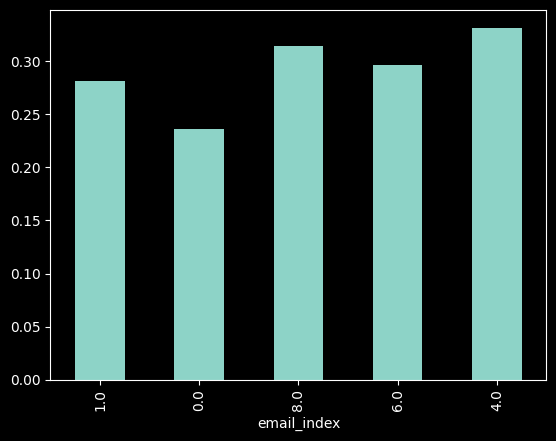

In [ ]:
t.sort_values('count',ascending=False)['mean'].head(5).plot(kind='bar')

In [ ]:
df.groupby('gender',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
gender,,
0,5698,0.307125
1,9665,0.252561


https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution.

# Model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [ ]:
X = ['gender', 'device_quaility_index', 'behavioral_index',
       'type_of_document', 'age', 'email_domain_formatted', 'social_status',
       'salary', 'disbursment_type', 'os', 'email_index']
y = ['fpd5_flg']

In [ ]:
# Предположим, у вас есть DataFrame df с числовыми и категориальными признаками
numeric_features = {
                    'most_freq_num_features': ['device_quaility_index','behavioral_index', 'email_index'],
                    'median_num_features': ['age', 'salary']
                    }

numeric_features2 = ['device_quaility_index','behavioral_index', 'email_index','age', 'salary']

categorical_features = ['gender', 'type_of_document','email_domain_formatted','social_status',
                        'disbursment_type','os']

In [ ]:
numeric_transformer = ColumnTransformer(transformers=[
                                                      ('most_freq_num_features',
                                                       Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('std_scaler', StandardScaler())]),
                                                       numeric_features['most_freq_num_features']),

                                                      ('median_num_features',
                                                       Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())]),
                                                       numeric_features['median_num_features'])
                                                    ]
                                        )

# Определение преобразований для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропущенных значений
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

# Создание ColumnTransformer с указанием, какие преобразования применять к каким признакам
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features2),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание конечного пайплайна с преобразованиями и моделью
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])


In [ ]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.3, random_state=42)


In [ ]:
y_train.values.ravel()

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# Обучение модели
pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('most_freq_num_features',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('std_scaler',
                                                                                                    StandardScaler())]),
                                                                                   ['device_quaility_index',
                                                                                    'behavioral_index',
                                                                                    'email_index']),
                                                                                  ('median_num_features',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImp...
                                                                                    'salary'])]),
                                                  ['device_quaility_index',
                                                   'behavioral_index',
                                                   'email_index', 'age',
                                                   'salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'type_of_document',
                                                   'email_domain_formatted',
                                                   'social_status',
                                                   'disbursment_type',
                                                   'os'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred = pipeline.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7003688435669343

In [ ]:
# Оценка модели
accuracy = pipeline.score(X_test, y_test)
accuracy

0.7003688435669343

In [ ]:
res = pd.DataFrame(y_pred).join(X_test).rename(columns={0: 'fpd5_flg'})

In [ ]:
cv_results = cross_validate(pipeline, df[X], df[y].values.ravel(), cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
cv_results

{'fit_time': array([11.11892581, 11.65872669, 11.77546024, 11.68996239, 11.01412797]),
 'score_time': array([0.12136936, 0.13874388, 0.14925218, 0.12325954, 0.16179633]),
 'test_accuracy': array([0.70061829, 0.70159453, 0.69736414, 0.68554688, 0.70182292]),
 'test_precision': array([0.36601307, 0.37299035, 0.34364261, 0.28666667, 0.35766423]),
 'test_recall': array([0.13365155, 0.13842482, 0.11918951, 0.1026253 , 0.11694511]),
 'test_f1': array([0.1958042 , 0.20191471, 0.17699115, 0.15114236, 0.17625899])}